# ARIMAモデル

## Box-Jenkins法

Box-Jenkins法は、時系列データの分析のフレームワーク。

以下の手順で分析を行う

1. データを分析しやすくなるよう変換する（定常過程にする）
2. ARIMAモデル系のモデルを適用する
3. モデルの適合性を評価する
4. モデルを用いて予測する

## AR過程

**自己回帰（AR）過程** （autoregressive process）は、過程が自身の過去に回帰された形で表現される過程。

:::{card} 1次AR過程 $\text{AR}(1)$

$$
y_t=c+\phi_1 y_{t-1}+\varepsilon_t, \quad \varepsilon_t \sim \text { W.N. }(\sigma^2)
$$

- $c$：定数項
- $\phi_1$：係数

:::

一般の$p$次AR過程は次のように表される。

:::{admonition} $p$次AR過程 $\text{AR}(p)$

$$
\begin{aligned}
y_t &= c + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \cdots + \phi_p y_{t-p} + \varepsilon_t\\
&= c + \sum_{i=1}^p \phi_i y_{t-i} + \varepsilon_t\\
\end{aligned}
$$

- $c$：定数項
- $\phi_i$：係数

:::

### 特性方程式と定常性

ARモデルは常に定常になるとは限らない。定常性をもつ条件は、$\text{AR}(1)$なら$|\phi_1| < 1$となる。

一般の$\text{AR}(p)$ 過程では

$$
y_t = c + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \cdots + \phi_p y_{t-p} + \varepsilon_t
$$

ラグ作用素$L$を用いると

$$
\left(1 - \phi_1 L - \phi_2 L^2 - \cdots - \phi_p L^p\right) y_t = c + \varepsilon_t
$$

この多項式を$\phi(L)$とすると、**特性方程式**は

$$
\phi(z) = 1 - \phi_1 z - \phi_2 z^2 - \cdots - \phi_p z^p = 0
$$

AR(p)過程が定常であるための条件は、**特性方程式の全ての根が単位円の外側にある**こと。つまり、すべての根$z_i$について$|z_i| > 1$が成り立つ必要がある。


## MA過程

**移動平均（MA）過程** （moving average process） はホワイトノイズ$\text{W.N.}$の線形和による過程。

:::{card} 1次MA過程$MA(1)$

$$
y_t=\mu+\varepsilon_t+\theta_1 \varepsilon_{t-1}, \quad \varepsilon_t \sim \text{W.N.}(\sigma^2)
$$

:::

$t-1$時点は $y_{t-1}=\mu+\varepsilon_{t-1}+\theta_1 \varepsilon_{t-2}$ となり、$y_t$と共通する $\varepsilon_{t-1}$ を含むため、$y_t$と$y_{t-1}$の間の自己相関を表現するモデルとなる。$\theta_1$が自己相関の強さを表す。


:::{admonition} $q$次移動平均過程 $\text{MA}(q)$

$$
\begin{aligned}
y_t &= \mu + \varepsilon_t + \theta_1 \varepsilon_{t-1} + \theta_2 \varepsilon_{t-2} + \cdots + \theta_q \varepsilon_{t-q}
\\
&= \mu + \sum_{j=1}^q \theta_j \varepsilon_{t-j} + \varepsilon_t
\end{aligned}
$$

:::


ラグ作用素を用いると

$$
y_t = \mu + \theta(L) \varepsilon_t = \mu + (1 + \theta_1 L + \theta_2 L^2 + \cdots + \theta_q L^q) \varepsilon_t
$$

### MA過程の性質

- **常に定常**: MA過程は常に定常である（ホワイトノイズの有限和であり、定常過程の和は定常過程になるため）
- **有限の自己共分散**: ラグ$q$より大きいラグでは自己共分散が0になる
- **反転可能性**: MA過程をAR表現に変換できる条件として、特性方程式$\theta(z) = 0$の全ての根が単位円の外側にある必要がある

### MA(1)過程の自己共分散

MA(1)過程 $y_t = \mu + \varepsilon_t + \theta_1 \varepsilon_{t-1}$ の自己共分散は

$$
\gamma(k) = \begin{cases}
(1 + \theta_1^2)\sigma^2 & k = 0 \\
\theta_1 \sigma^2 & k = 1 \\
0 & k \geq 2
\end{cases}
$$

## ARMAモデル

**自己回帰移動平均（ARMA）過程** はARモデルとMAモデルを組み合わせたモデル。ARMA(p, q)過程は

$$
\begin{aligned}
y_t &= c + \phi_1 y_{t-1} + \cdots + \phi_p y_{t-p} + \varepsilon_t + \theta_1 \varepsilon_{t-1} + \cdots + \theta_q \varepsilon_{t-q}\\
&= c + \sum_{i=1}^p \phi_i y_{t-i} + \varepsilon_t + \sum_{j=1}^q \theta_j \varepsilon_{t-j}
\end{aligned}
$$

ラグ作用素を用いると

$$
\phi(L) y_t = c + \theta(L) \varepsilon_t
$$

### ARMAモデルの定常性と反転可能性

- **定常性**: AR部分の特性方程式$\phi(z) = 0$の全ての根が単位円の外側にあること
- **反転可能性**: MA部分の特性方程式$\theta(z) = 0$の全ての根が単位円の外側にあること

### モデル選択

適切なARMAモデルの次数(p, q)を選択するために以下の方法を用いる:

- **ACF (自己相関関数)**: MA次数qの決定に有用（ラグqより後で急激に減衰）
- **PACF (偏自己相関関数)**: AR次数pの決定に有用（ラグpより後で急激に減衰）
- **情報量基準**: AIC（赤池情報量基準）、BIC（ベイズ情報量基準）などを用いてモデルを比較

## ARIMAモデル

**自己回帰和分移動平均（ARIMA）過程** は非定常時系列をモデル化するために、差分化を組み込んだモデル。ARIMA(p, d, q)過程は以下のように定義される:

$$
\phi(L) (1-L)^d y_t = c + \theta(L) \varepsilon_t
$$

ここで
- $p$: AR次数（自己回帰の次数）
- $d$: 差分の次数（和分の次数）
- $q$: MA次数（移動平均の次数）
- $(1-L)^d$: d階差分作用素

### 差分化による定常化

非定常な時系列データに対して、d階差分をとることで定常時系列に変換する:

- **1階差分**: $\nabla y_t = y_t - y_{t-1} = (1-L)y_t$
- **2階差分**: $\nabla^2 y_t = \nabla y_t - \nabla y_{t-1} = (1-L)^2 y_t$

### ARIMAモデルの構築手順

1. **定常性の確認**: 
   - 時系列プロットの目視確認
   - 単位根検定（ADF検定、KPSS検定など）
   
2. **差分化**: 非定常の場合、適切な次数dで差分化
   
3. **次数の決定**: 
   - ACF、PACFの確認
   - 情報量基準（AIC、BIC）による比較
   
4. **パラメータの推定**: 最尤法などによる推定
   
5. **診断チェック**: 
   - 残差の正規性検定
   - 残差の自己相関チェック（Ljung-Box検定）

## SARIMAモデル

**季節性自己回帰和分移動平均（SARIMA）過程** は、季節性を持つ時系列データをモデル化するためにARIMAモデルを拡張したもの。SARIMA(p, d, q)(P, D, Q)ₛ と表記される。

$$
\phi(L)\Phi(L^s)(1-L)^d(1-L^s)^D y_t = c + \theta(L)\Theta(L^s)\varepsilon_t
$$

ここで
- $(p, d, q)$: 非季節部分の次数
- $(P, D, Q)$: 季節部分の次数
- $s$: 季節の周期（例：月次データなら12、四半期データなら4）
- $\Phi(L^s)$: 季節AR多項式
- $\Theta(L^s)$: 季節MA多項式
- $(1-L^s)^D$: 季節差分作用素

### 季節差分

季節性を除去するために季節差分を適用する:

- **季節差分**: $\nabla_s y_t = y_t - y_{t-s} = (1-L^s)y_t$
- 例：月次データの場合、$\nabla_{12} y_t = y_t - y_{t-12}$

### SARIMAモデルの例

月次販売データでSARIMA(1,1,1)(1,1,1)₁₂ を考えると:

- 非季節部分: AR(1), 1階差分, MA(1)
- 季節部分: 季節AR(1), 季節1階差分, 季節MA(1), 周期12

### モデル選択のポイント

- **季節ACF/PACF**: 季節ラグ(s, 2s, 3s, ...)での挙動を確認
- **段階的な差分化**: まず季節差分、次に通常差分を適用
- **情報量基準**: 複数のモデル候補を比較してAIC/BICが最小のモデルを選択

## Pythonによる実装例

以下では、`statsmodels`ライブラリを用いたARIMAモデルの実装例を示す。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

### データの生成と定常性の確認

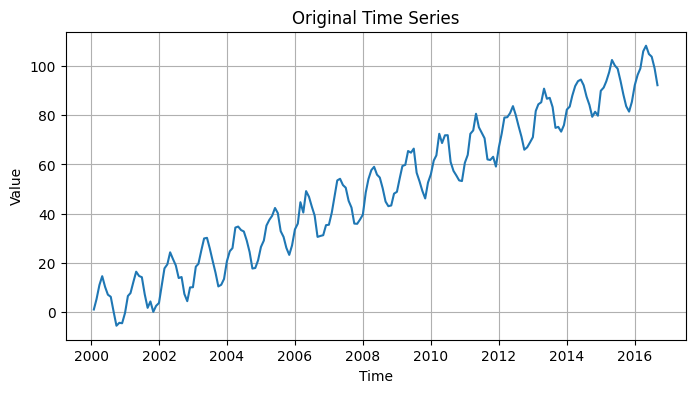

In [13]:
# サンプルデータの生成（トレンドと季節性を含む）
np.random.seed(42)
n = 200
t = np.arange(n)

# トレンド + 季節性 + ノイズ
trend = 0.5 * t
seasonal = 10 * np.sin(2 * np.pi * t / 12)
noise = np.random.normal(0, 2, n)
y = trend + seasonal + noise

# データフレームに変換
df = pd.DataFrame({
    'time': pd.date_range('2000-01', periods=n, freq='M'),
    'value': y
})
df.set_index('time', inplace=True)

# プロット
plt.figure(figsize=(8, 4))
plt.plot(df.index, df['value'])
plt.title('Original Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [3]:
# ADF検定による定常性の確認
def adf_test(series, name=''):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Test: {name}')
    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    print(f'Critical Values:')
    for key, value in result[4].items():
        print(f'  {key}: {value:.4f}')
    
    if result[1] <= 0.05:
        print("=> 帰無仮説を棄却: データは定常")
    else:
        print("=> 帰無仮説を棄却できない: データは非定常")
    print()

adf_test(df['value'], 'Original Series')

ADF Test: Original Series
ADF Statistic: 0.0271
p-value: 0.9607
Critical Values:
  1%: -3.4658
  5%: -2.8771
  10%: -2.5751
=> 帰無仮説を棄却できない: データは非定常



### 差分化と ACF/PACF の確認

ADF Test: 1st Difference
ADF Statistic: -9.4658
p-value: 0.0000
Critical Values:
  1%: -3.4660
  5%: -2.8772
  10%: -2.5751
=> 帰無仮説を棄却: データは定常



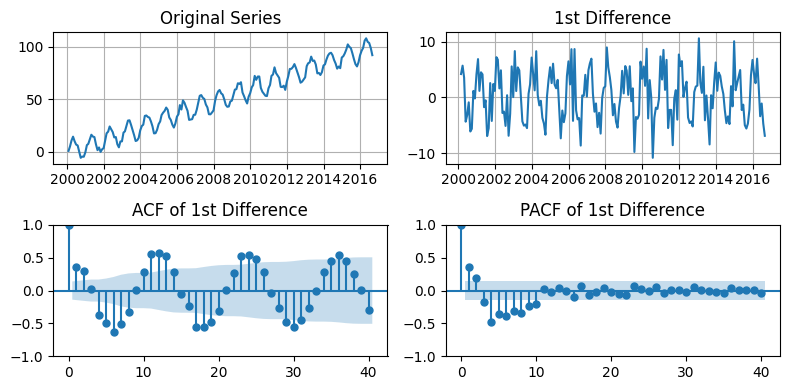

In [12]:
# 1階差分
df['diff1'] = df['value'].diff()

# 1階差分のADF検定
adf_test(df['diff1'].dropna(), '1st Difference')

# ACFとPACFのプロット
fig, axes = plt.subplots(2, 2, figsize=(8, 4))

# 元データ
axes[0, 0].plot(df['value'])
axes[0, 0].set_title('Original Series')
axes[0, 0].grid(True)

# 1階差分
axes[0, 1].plot(df['diff1'])
axes[0, 1].set_title('1st Difference')
axes[0, 1].grid(True)

# ACF
plot_acf(df['diff1'].dropna(), lags=40, ax=axes[1, 0])
axes[1, 0].set_title('ACF of 1st Difference')

# PACF
plot_pacf(df['diff1'].dropna(), lags=40, ax=axes[1, 1])
axes[1, 1].set_title('PACF of 1st Difference')

plt.tight_layout()
plt.show()

### ARIMAモデルの適合

In [5]:
# データを訓練セットとテストセットに分割
train_size = int(len(df) * 0.8)
train, test = df['value'][:train_size], df['value'][train_size:]

print(f"Training set size: {len(train)}")
print(f"Test set size: {len(test)}")

# ARIMA(1,1,1)モデルの適合
model = ARIMA(train, order=(1, 1, 1))
fitted_model = model.fit()

# モデルのサマリー
print(fitted_model.summary())

Training set size: 160
Test set size: 40
                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  160
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -454.238
Date:                Wed, 22 Oct 2025   AIC                            914.475
Time:                        23:49:06   BIC                            923.682
Sample:                    01-31-2000   HQIC                           918.214
                         - 04-30-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5562      0.179      3.108      0.002       0.206       0.907
ma.L1         -0.2064      0.219     -0.944      0.345      -0.635       0.222
sigma2     

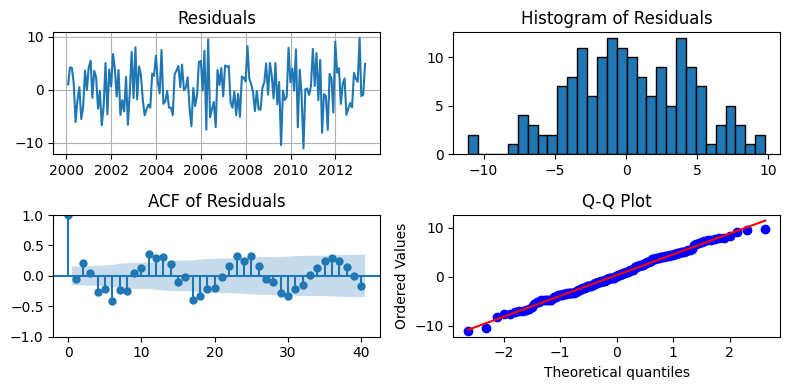

In [11]:
# 残差診断
residuals = fitted_model.resid

fig, axes = plt.subplots(2, 2, figsize=(8, 4))

# 残差のプロット
axes[0, 0].plot(residuals)
axes[0, 0].set_title('Residuals')
axes[0, 0].grid(True)

# 残差のヒストグラム
axes[0, 1].hist(residuals, bins=30, edgecolor='black')
axes[0, 1].set_title('Histogram of Residuals')

# 残差のACF
plot_acf(residuals, lags=40, ax=axes[1, 0])
axes[1, 0].set_title('ACF of Residuals')

# Q-Qプロット
from scipy import stats
stats.probplot(residuals, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot')

plt.tight_layout()
plt.show()

### 予測と評価

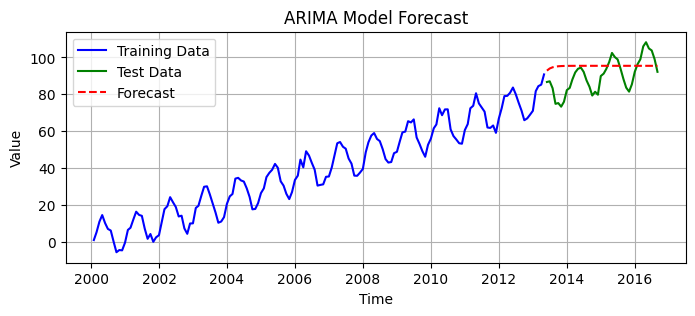

Mean Squared Error (MSE): 107.1315
Root Mean Squared Error (RMSE): 10.3504
Mean Absolute Error (MAE): 8.5531


In [14]:
# 予測
forecast_steps = len(test)
forecast = fitted_model.forecast(steps=forecast_steps)

# 予測結果のプロット
plt.figure(figsize=(8, 3))
plt.plot(train.index, train, label='Training Data', color='blue')
plt.plot(test.index, test, label='Test Data', color='green')
plt.plot(test.index, forecast, label='Forecast', color='red', linestyle='--')
plt.title('ARIMA Model Forecast')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# 評価指標の計算
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test, forecast)

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')

### SARIMAモデルの適合例

In [8]:
# SARIMA(1,1,1)(1,1,1,12)モデルの適合
# 季節周期12（月次データを想定）
sarima_model = SARIMAX(
    train,
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 12),
    enforce_stationarity=False,
    enforce_invertibility=False
)

sarima_fitted = sarima_model.fit(disp=False)

# モデルのサマリー
print(sarima_fitted.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              value   No. Observations:                  160
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -284.837
Date:                            Wed, 22 Oct 2025   AIC                            579.675
Time:                                    23:49:10   BIC                            594.127
Sample:                                01-31-2000   HQIC                           585.548
                                     - 04-30-2013                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1455      0.100     -1.462      0.144      -0.341       0.050
ma.L1         -0.9770      0.060   

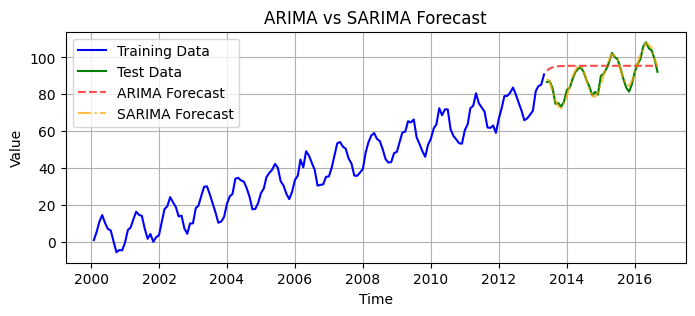

ARIMA Model:
  RMSE: 10.3504
  MAE: 8.5531

SARIMA Model:
  RMSE: 1.6979
  MAE: 1.3390


In [15]:
# SARIMAモデルによる予測
sarima_forecast = sarima_fitted.forecast(steps=forecast_steps)

# 予測結果の比較
plt.figure(figsize=(8, 3))
plt.plot(train.index, train, label='Training Data', color='blue')
plt.plot(test.index, test, label='Test Data', color='green')
plt.plot(test.index, forecast, label='ARIMA Forecast', color='red', linestyle='--', alpha=0.7)
plt.plot(test.index, sarima_forecast, label='SARIMA Forecast', color='orange', linestyle='-.', alpha=0.7)
plt.title('ARIMA vs SARIMA Forecast')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# SARIMAモデルの評価
sarima_mse = mean_squared_error(test, sarima_forecast)
sarima_rmse = np.sqrt(sarima_mse)
sarima_mae = mean_absolute_error(test, sarima_forecast)

print('ARIMA Model:')
print(f'  RMSE: {rmse:.4f}')
print(f'  MAE: {mae:.4f}')
print()
print('SARIMA Model:')
print(f'  RMSE: {sarima_rmse:.4f}')
print(f'  MAE: {sarima_mae:.4f}')